##Import Liberies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Upload the Dataset

In [2]:
!kaggle datasets download -d willianoliveiragibin/healthcare-insurance

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance
License(s): CC0-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 27.9MB/s]


In [3]:
#Unzip the dataset
!unzip healthcare-insurance.zip

Archive:  healthcare-insurance.zip
  inflating: insurance.csv           


##Call Dataset

In [4]:
data = pd.read_csv('insurance.csv' , header =0)
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##EDA

###Get some statical information

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Numeric Column
df_numC = df.select_dtypes(include = "number").columns
#Numeric dataframe
df_numF = df.select_dtypes(include = "number")

#Catagorical Column
df_catC = df.select_dtypes(exclude= "number").columns
#Categorical dataframe
df_catF = df.select_dtypes(exclude = "number")

In [8]:
#Transpose
df_numF.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
#Transpose
df_catF.describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [10]:
#Correlation
df[df_numC].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


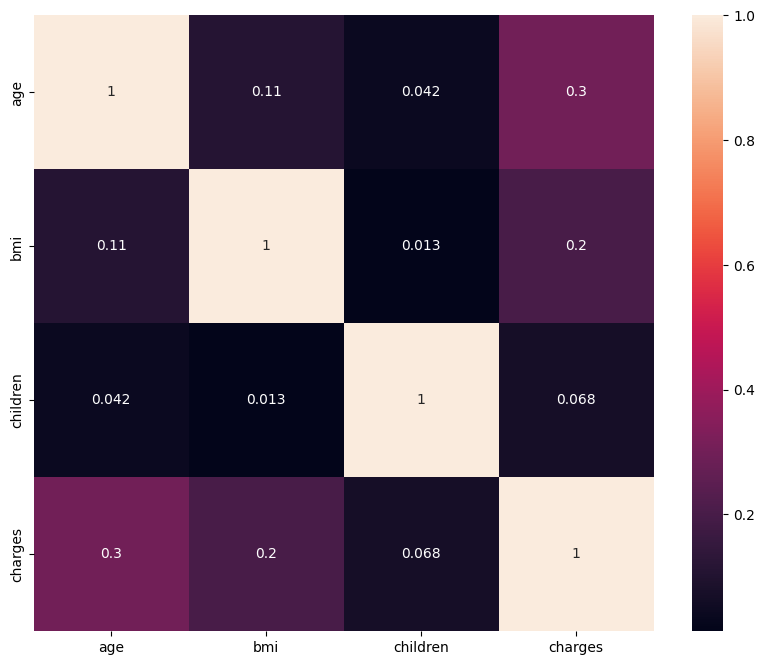

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df[df_numC].corr() , annot = True)
plt.show()

###Duplicate Handling

In [12]:
# remove duplicate
df.duplicated().sum() #Summation

1

In [13]:
df = df.drop_duplicates()

###Null Handling

In [ ]:
#Check the null
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [31]:
#Checking Null value in each row
for i in range(len(df.index)):
  print("Total Null in row ",i+1 , ":"),df.iloc[i].isnull()

Total Null in row  1 :
Total Null in row  2 :
Total Null in row  3 :
Total Null in row  4 :
Total Null in row  5 :
Total Null in row  6 :
Total Null in row  7 :
Total Null in row  8 :
Total Null in row  9 :
Total Null in row  10 :
Total Null in row  11 :
Total Null in row  12 :
Total Null in row  13 :
Total Null in row  14 :
Total Null in row  15 :
Total Null in row  16 :
Total Null in row  17 :
Total Null in row  18 :
Total Null in row  19 :
Total Null in row  20 :
Total Null in row  21 :
Total Null in row  22 :
Total Null in row  23 :
Total Null in row  24 :
Total Null in row  25 :
Total Null in row  26 :
Total Null in row  27 :
Total Null in row  28 :
Total Null in row  29 :
Total Null in row  30 :
Total Null in row  31 :
Total Null in row  32 :
Total Null in row  33 :
Total Null in row  34 :
Total Null in row  35 :
Total Null in row  36 :
Total Null in row  37 :
Total Null in row  38 :
Total Null in row  39 :
Total Null in row  40 :
Total Null in row  41 :
Total Null in row  42 :
T

**Becuase have not got any null, we don't use Imputation Method**



###Skewness

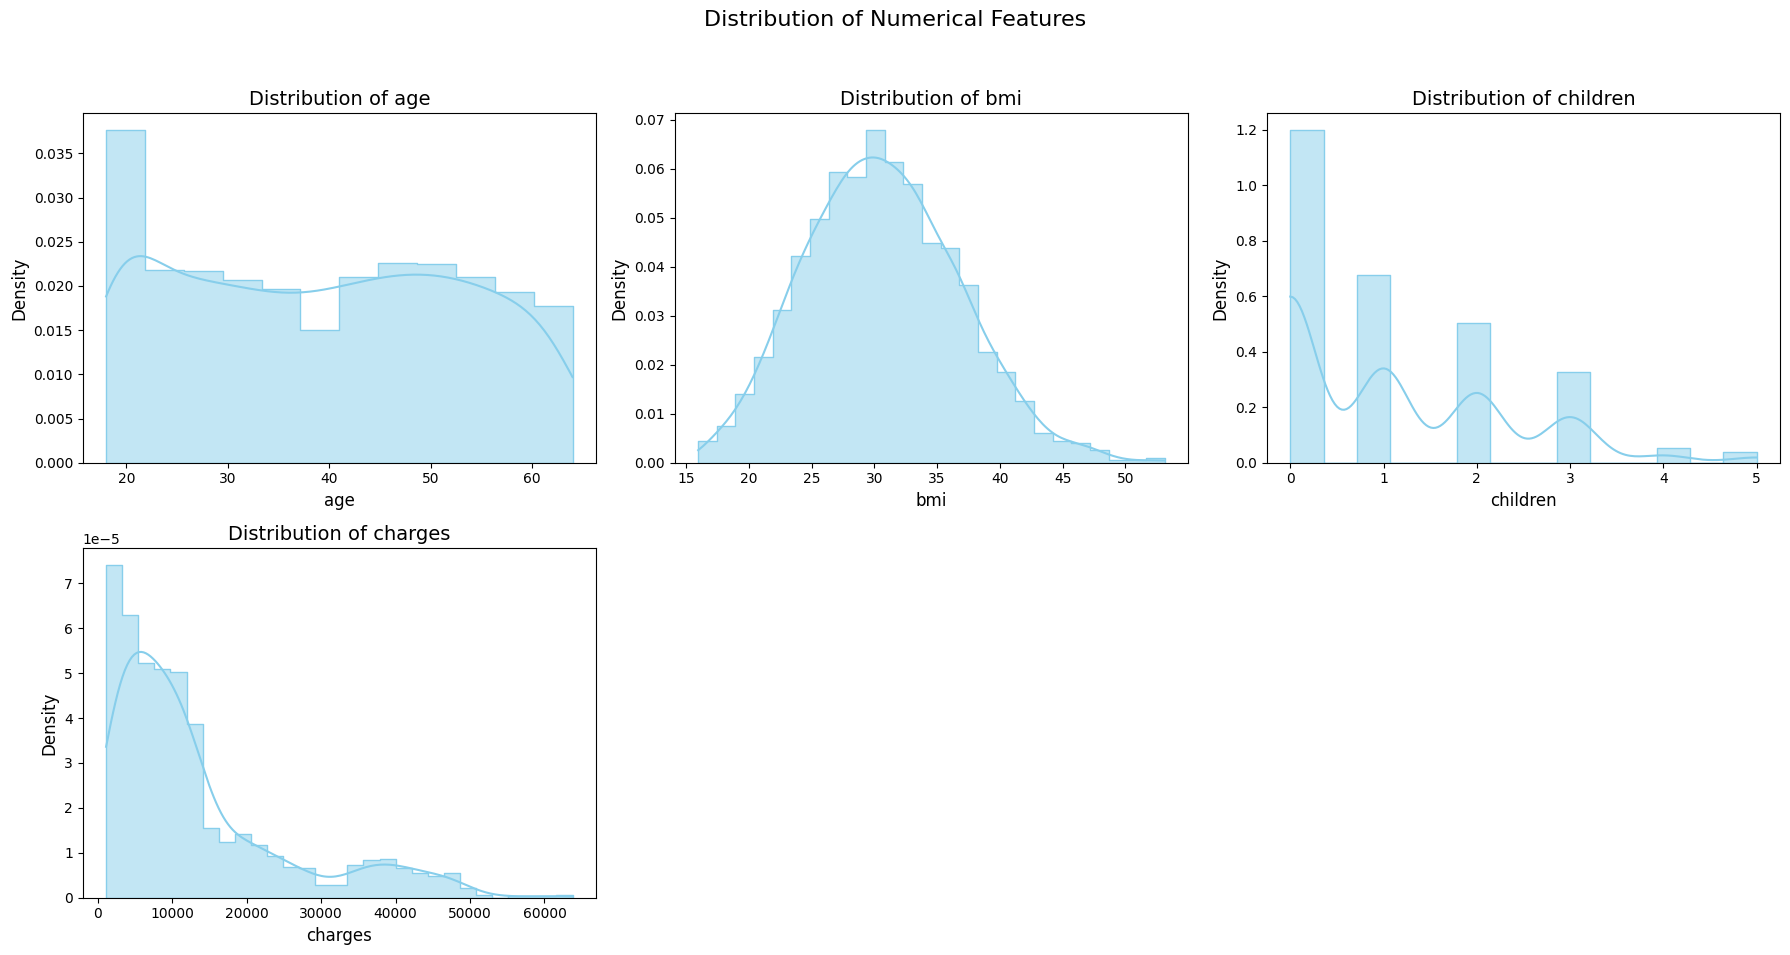

In [14]:
# Skewness analysis
def visualize_numerical_distributions(df, exclude_columns='id'):

    # Identify numerical columns (excluding specified columns)
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != exclude_columns]

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a histogram with KDE
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()


visualize_numerical_distributions(df)

In [15]:
from scipy import stats

def robust_skewness_handler(df, threshold=0.5):
    transformed_df = df.copy()
    transformation_dict = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        skewness = data.skew()

        if abs(skewness) > threshold:
            print(f"Handling skewness for {col} (skewness: {skewness:.2f})")

            # Handle zero-inflated or near-zero-inflated data
            if (data == 0).sum() / len(data) > 0.1:  # If more than 10% zeros
                non_zero = data[data != 0]
                if len(non_zero) > 0:
                    log_transform = np.log1p(non_zero)
                    transformed_df.loc[data != 0, col] = log_transform
                    transformation_dict[col] = ('log1p', 'zero-inflated')
                    print(f"  Applied Log1p to non-zero values for {col}")
                continue

            # Try Box-Cox transformation
            min_val = data.min()
            if min_val <= 0:
                shift = abs(min_val) + 1
                shifted_data = data + shift
            else:
                shifted_data = data

            try:
                transformed_data, lambda_param = stats.boxcox(shifted_data)
                transformed_df[col] = transformed_data
                transformation_dict[col] = ('box-cox', lambda_param)
                print(f"  Applied Box-Cox to {col} (lambda: {lambda_param:.2f})")
            except:
                # If Box-Cox fails, try other transformations
                if skewness > 0:  # Right-skewed
                    if data.max() / data.min() > 1000:  # Very large range
                        transformed_df[col] = np.log1p(data)
                        transformation_dict[col] = ('log1p', None)
                        print(f"  Applied Log1p to {col}")
                    else:
                        transformed_df[col] = np.sqrt(data)
                        transformation_dict[col] = ('sqrt', None)
                        print(f"  Applied Square Root to {col}")
                else:  # Left-skewed
                    transformed_df[col] = data ** 2
                    transformation_dict[col] = ('square', None)
                    print(f"  Applied Square to {col}")

    return transformed_df, transformation_dict

# Example usage:
transformed_df, transformations = robust_skewness_handler(df)

Handling skewness for children (skewness: 0.94)
  Applied Log1p to non-zero values for children
Handling skewness for charges (skewness: 1.52)
  Applied Box-Cox to charges (lambda: 0.04)


<ipython-input-15-8714d1316884>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69314718 1.38629436 0.69314718 1.38629436 1.09861229 0.69314718
 0.69314718 0.69314718 0.69314718 1.09861229 1.38629436 1.09861229
 0.69314718 1.09861229 1.79175947 0.69314718 1.38629436 0.69314718
 1.09861229 0.69314718 1.09861229 0.69314718 1.09861229 0.69314718
 1.09861229 0.69314718 1.38629436 1.09861229 1.09861229 1.09861229
 0.69314718 1.09861229 1.38629436 1.60943791 0.69314718 0.69314718
 1.09861229 0.69314718 1.38629436 1.79175947 1.38629436 0.69314718
 1.09861229 0.69314718 0.69314718 0.69314718 1.60943791 1.09861229
 1.09861229 0.69314718 1.38629436 1.09861229 1.09861229 0.69314718
 1.38629436 1.38629436 0.69314718 0.69314718 0.69314718 1.09861229
 0.69314718 1.09861229 1.38629436 0.69314718 1.09861229 1.09861229
 0.69314718 1.38629436 1.09861229 1.09861229 1.09861229 1.38629436
 1.09861229 0.69314718 1.09861229 1.098612

In [16]:
transformed_df = df

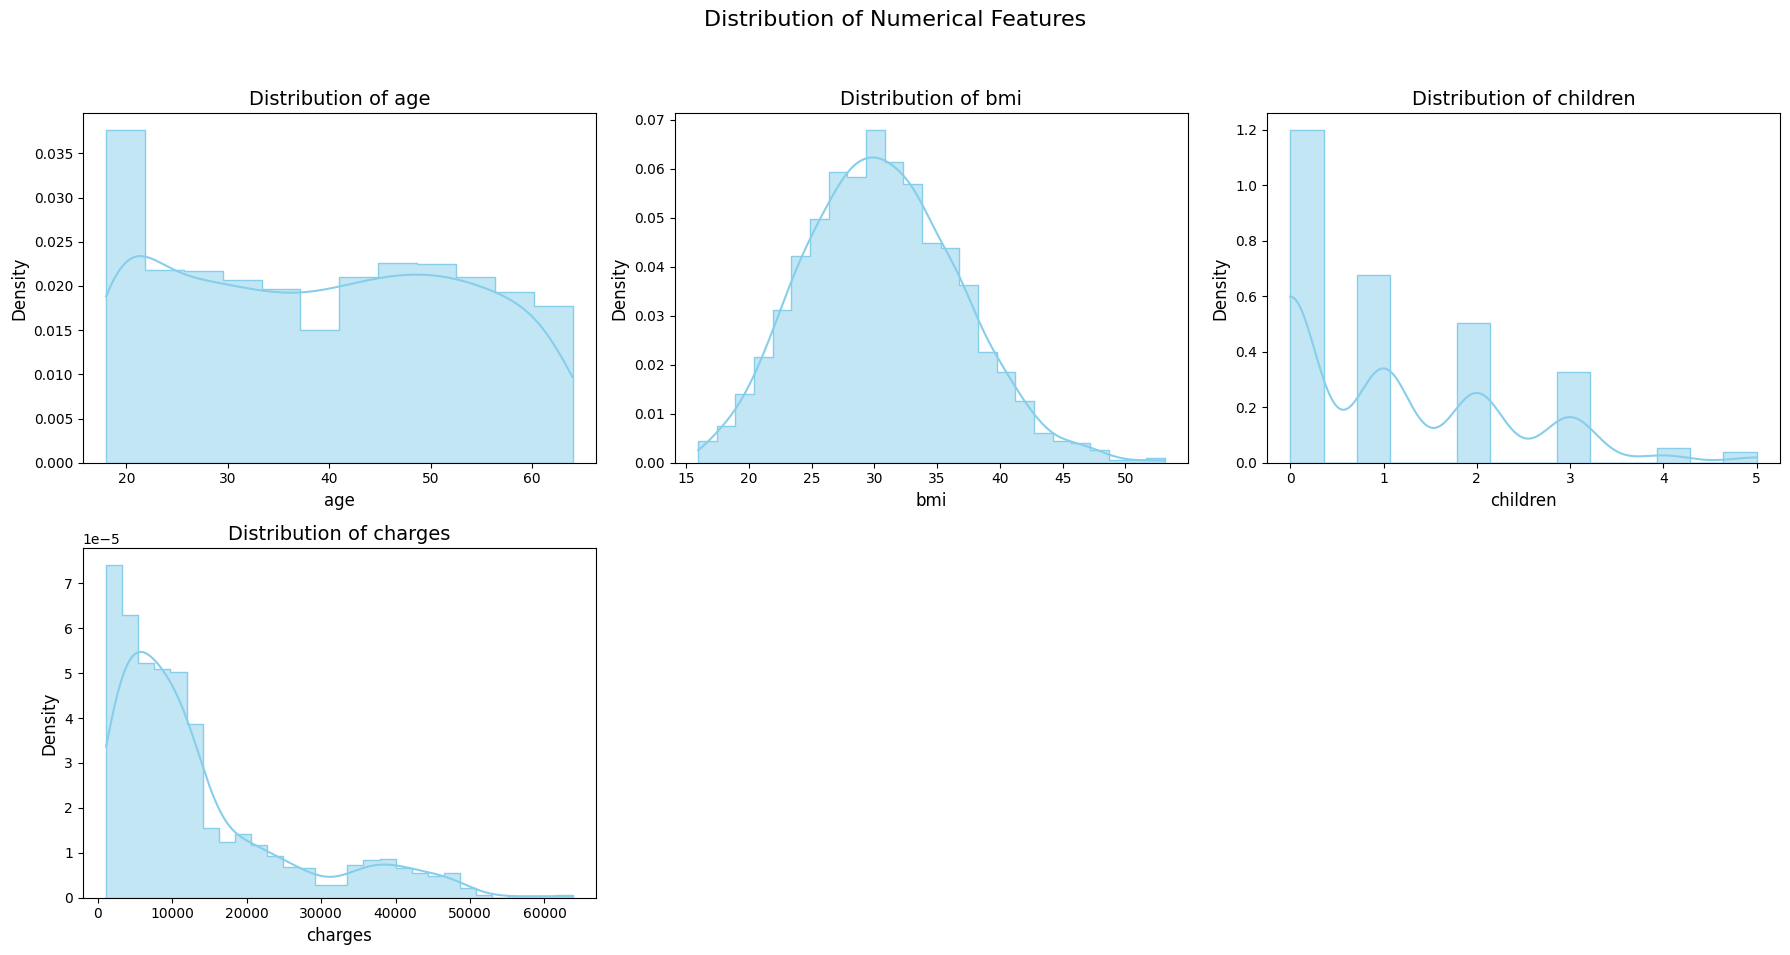

In [35]:
visualize_numerical_distributions(df)

###Outlier Handling

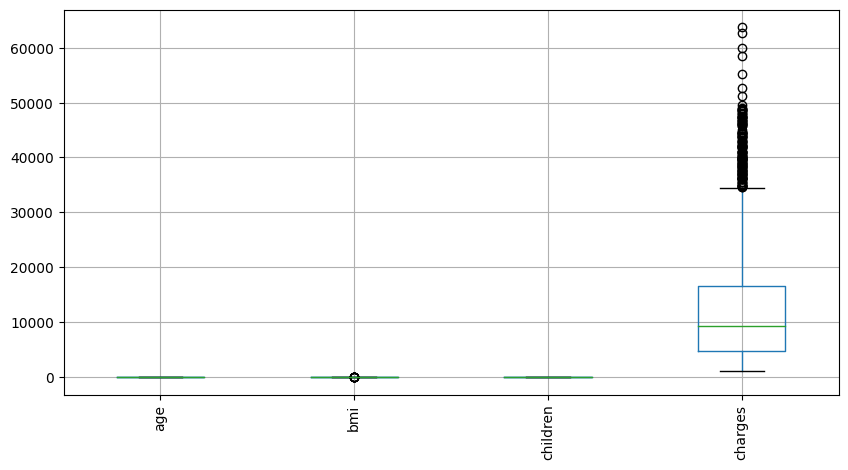

In [18]:
plt.figure(figsize=(10,5))
df_numF.boxplot()
plt.xticks(rotation=90)
plt.show()

In [19]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Example usage:
calculate_outliers_percentage(df)

Percentage of outliers in age: 0.00%
Percentage of outliers in bmi: 0.67%
Percentage of outliers in children: 0.00%
Percentage of outliers in charges: 10.40%


In [20]:
def handle_outliers(df):
    for column in df_numF:
        Q1 = df_numF[column].quantile(0.25)
        Q3 = df_numF[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df_numF[column] = df_numF[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply to both training and test datasets
df_numF1 = handle_outliers(df_numF)

In [21]:
calculate_outliers_percentage(df_numF)

Percentage of outliers in age: 0.00%
Percentage of outliers in bmi: 0.00%
Percentage of outliers in children: 0.00%
Percentage of outliers in charges: 0.00%


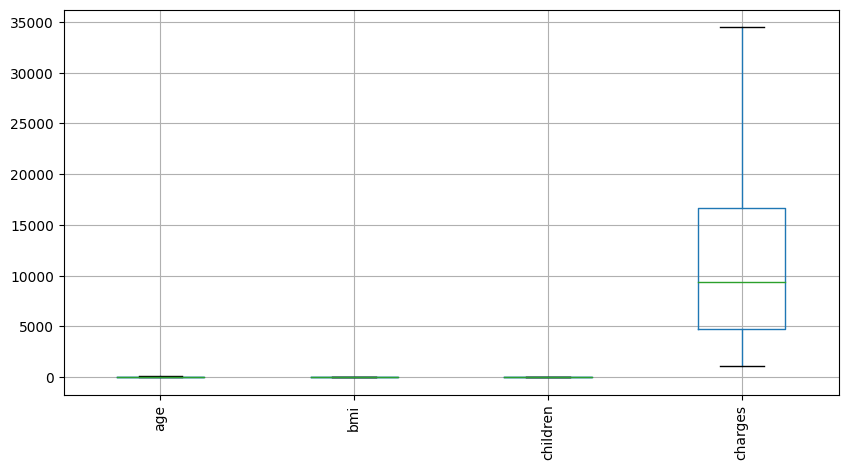

In [22]:
plt.figure(figsize=(10,5))
df_numF.boxplot()
plt.xticks(rotation=90)
plt.show()

###Filter

In [23]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
#Groupby
area_sector = df.groupby("region")["charges"].agg(["sum" , "mean" , "median"])

In [25]:
#loc
df.loc[(df["region"] == "northwest" ) & (df["smoker"] == "yes") & (df["sex"] == "female"), ["charges" , "bmi"]].reset_index()

,index,charges,bmi
0,64,14711.74380,22.420
1,86,43578.93940,31.160
2,128,32734.18630,17.765
3,160,21348.70600,26.600
4,375,18033.96790,28.310
5,419,28950.46920,26.980
6,558,39983.42595,34.105
7,587,43943.87610,30.210
8,604,17468.98390,28.310
9,607,25678.77845,23.655


In [26]:
#Query
df.query('region == "northwest"')

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1324,31,male,25.935,1,no,northwest,4239.89265
1333,50,male,30.970,3,no,northwest,10600.54830


In [27]:
## isin function
df[df['region'].isin(['northwest', 'southwest'])]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1336,21,female,25.800,0,no,southwest,2007.94500


###Visualize

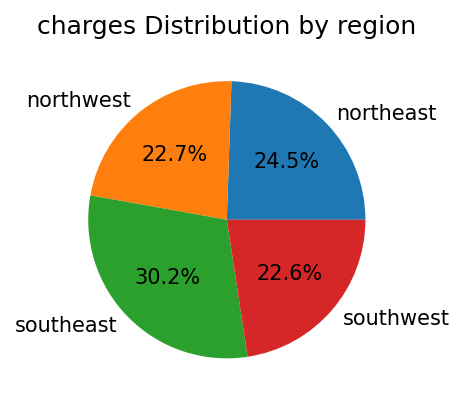

In [28]:
# Calculate total sales for each segment
region_by_charges = df.groupby('region')['charges'].sum()

# Create pie chart
plt.figure(figsize=(3, 3), dpi=150)
plt.pie(region_by_charges, labels=region_by_charges.index, autopct='%1.1f%%')
plt.title('charges Distribution by region')
plt.show()

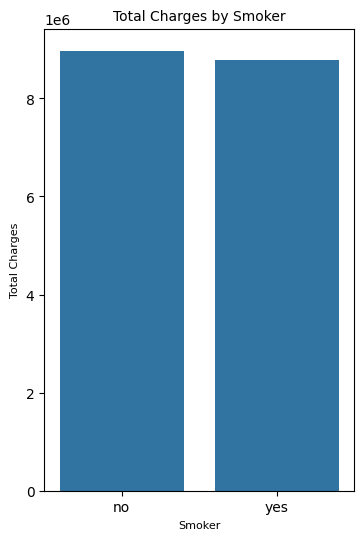

In [29]:
# Calculate total profits for each region
profits_by_region = df.groupby('smoker')['charges'].sum()

# Create vertical bar chart
plt.figure(figsize=(4, 6), dpi=100)
sns.barplot(x=profits_by_region.index, y=profits_by_region.values, orient='v')
plt.xlabel('Smoker', size=8)
plt.ylabel('Total Charges', size=8)
plt.title('Total Charges by Smoker', size=10)
plt.show()

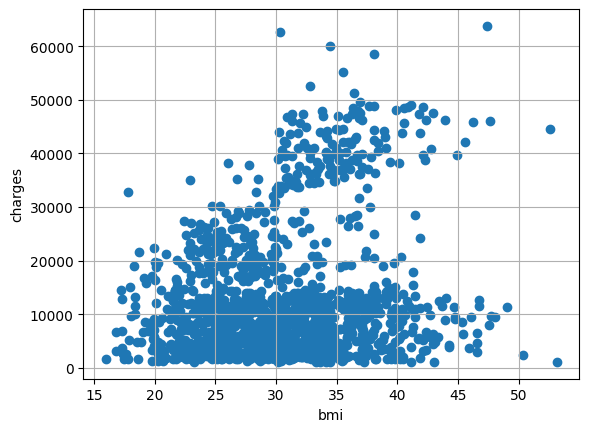

In [30]:
plt.scatter(df["bmi"] , df["charges"])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.grid()
plt.show()

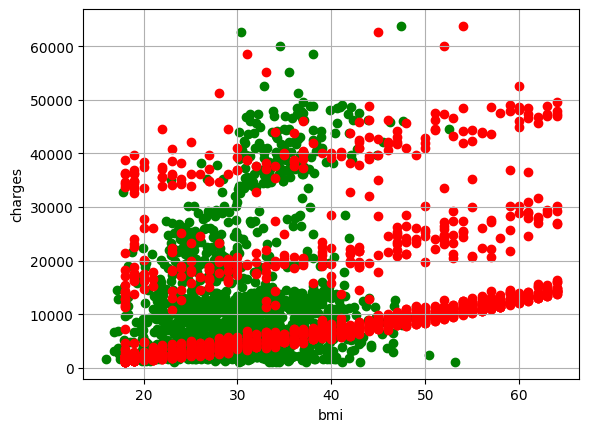

In [32]:
# drawing two scatter plot together
plt.scatter(df["bmi"] , df["charges"] , color = "green")
plt.scatter(df["age"] , df["charges"] , color = "red")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.grid()
plt.show()

###Castdown

In [34]:
#Change datatype

for i in df.select_dtypes(include = ["float64"]).columns :
  df[i] = df[i].astype("float32")
for i in df.select_dtypes(include = ["int64"]).columns :
  df[i] = df[i].astype("int8")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int8   
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float32
 3   children  1337 non-null   int8   
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float32
dtypes: float32(2), int8(2), object(3)
memory usage: 54.8+ KB


<ipython-input-34-489a719107bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype("float32")
<ipython-input-34-489a719107bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype("float32")
<ipython-input-34-489a719107bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

###Save to CSV

In [36]:
#Save to csv
df.to_csv("Insurance.csv")